In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import requests
import json
import data_import
import gmaps
import gmaps.geojson_geometries
import api_keys

In [3]:
rest_df = data_import.get_rest_countries()

In [4]:
cia_df = data_import.get_cia_data()

In [236]:
#drop NaN values
new_cia = cia_df.dropna(subset=['internet_users'])


229

In [237]:

#check if country in rest_df is in cia_df

in_cia = rest_df.assign(In_new_cia=rest_df.country.isin(new_cia.country).astype(int))

list_cia = in_cia.loc[in_cia['In_new_cia'] == 0]
len(list_cia)

64

In [238]:
in_rest = new_cia.assign(In_rest_df=new_cia.country.isin(rest_df.country).astype(int))

list_rest= in_rest.loc[in_rest['In_rest_df'] == 0]
len(list_rest)

43

In [223]:
list_rest

,country,population,internet_users,internet_%_of_population,internet_global_rank,telephones_fixed_lines,telephone_mobile_cellular,median_age,gdp_purchasing_power_parity,gdp_global_rank,education_expenditures,education_expeditures_global_rank,In_new_rest
6,Andorra,85708.0,83887.0,97.9,177.0,38411,80337.0,44.9,3.327000e+09,186.0,3.2,132.0,0
10,Antigua And Barbuda,95882.0,60000.0,65.2,185.0,22504,180000.0,32.2,2.398000e+09,194.0,2.5,160.0,0
14,Aruba,116576.0,106309.0,93.5,175.0,35000,141000.0,39.5,4.158000e+09,180.0,6.1,32.0,0
17,Australia,23470145.0,20288409.0,88.2,32.0,8460000,27553000.0,38.8,1.248000e+12,19.0,5.3,47.0,0
19,Azerbaijan,10046516.0,7720502.0,78.2,54.0,1688325,10127000.0,31.7,1.722000e+11,73.0,2.9,142.0,0
28,Bermuda,71176.0,69126.0,98.0,179.0,21883,64997.0,43.5,6.127000e+09,172.0,1.5,170.0,0
30,Bolivia,11306341.0,4354678.0,39.7,82.0,851110,10106216.0,24.6,8.372000e+10,94.0,7.3,12.0,0
36,British Virgin Islands,35802.0,14600.0,43.6,208.0,10004,42000.0,36.7,5.000000e+08,213.0,6.3,27.0,0
37,Brunei,450565.0,306000.0,71.2,159.0,74213,544732.0,30.5,3.387000e+10,128.0,4.4,90.0,0
40,Burma,55622506.0,14264308.0,25.1,39.0,556112,47951228.0,28.5,3.298000e+11,53.0,0.8,175.0,0


In [239]:
merged_data = pd.merge(rest_df, new_cia, how = 'inner', on = 'country')

In [240]:
merged_data.to_csv("merged_data.csv")

<h1> Josh's Workspace </h1>

In [241]:
pop_low = merged_data["population"].quantile(0.1)
pop_hi  = merged_data["population"].quantile(0.90)
edu_low = merged_data['education_expenditures'].quantile(0.01)
edu_hi = merged_data['education_expenditures'].quantile(0.99)


df_filtered = merged_data[(merged_data["population"] < pop_hi) & (merged_data["population"] > pop_low) & (merged_data['education_expenditures'] > edu_low) & (merged_data['education_expenditures'] < edu_hi)]

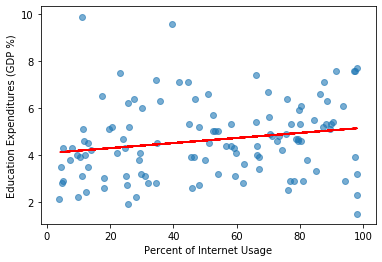

In [242]:
z = np.polyfit(df_filtered['internet_%_of_population'], df_filtered['education_expenditures'], 1)
p = np.poly1d(z)

plt.plot(df_filtered['internet_%_of_population'],p(df_filtered['internet_%_of_population']),"r--")
plt.scatter(df_filtered['internet_%_of_population'], df_filtered['education_expenditures'], alpha = .6)
plt.xlabel('Percent of Internet Usage')
plt.ylabel('Education Expenditures (GDP %)')

plt.show()

In [243]:
sub_df = df_filtered[['sub-region', 'internet_%_of_population', 'median_age', 'education_expenditures']]

In [244]:
sub_df = sub_df.groupby('sub-region').mean()

In [245]:
sub_df.head()

,internet_%_of_population,median_age,education_expenditures
sub-region,,,
Australia and New Zealand,88.350000,38.450000,5.800000
Caribbean,61.414286,34.571429,4.814286
Central America,40.385714,26.357143,4.942857
Central Asia,39.320000,27.980000,4.940000
Eastern Africa,24.375000,21.841667,4.525000


In [ ]:
# gmaps.configure(api_key = api_keys.google_key)

In [ ]:
# countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

# fig = gmaps.figure()

# gini_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(gini_layer)
# fig

In [ ]:
# pprint(countries_geojson['features'][0]['properties'])

In [ ]:
# len(countries_geojson['features'])

<h1>Daniela's Workspace</h1>

In [225]:
world = new_cia.iloc[[0]]
world


,country,population,internet_users,internet_%_of_population,internet_global_rank,telephones_fixed_lines,telephone_mobile_cellular,median_age,gdp_purchasing_power_parity,gdp_global_rank,education_expenditures,education_expeditures_global_rank
3,Albania,3057220.0,2016516.0,66.4,110.0,247010,3497950.0,33.4,3.601000e+10,125.0,4.0,108.0


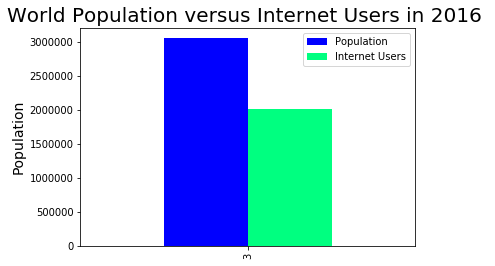

In [226]:
#plot World Population versus Internet Users

world = world[['population', 'internet_users']]
                        
world.plot(kind='bar',
           colormap='winter',
          sharex=True,
          )
plt.title("World Population versus Internet Users in 2016 ",fontsize= 20)
plt.ylabel("Population", fontsize=14)
plt.xlabel()
plt.legend(['Population', "Internet Users"])

plt.show()


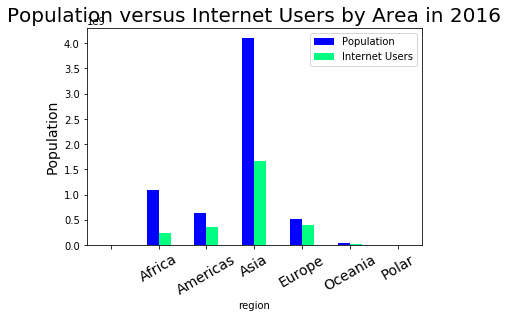

In [227]:
# Population versus Internet users by area
per_sub_area = (merged_data[['region', 'population', 'internet_users']]).groupby(['region']).sum()

#plot
per_sub_area.plot(kind="bar",
                  colormap='winter'
                 )              
                      
plt.title('Population versus Internet Users by Area in 2016', fontsize=20)
plt.ylabel("Population", fontsize=14)
plt.legend(['Population', "Internet Users"]);
plt.xticks(rotation =30,fontsize =14)

plt.show()

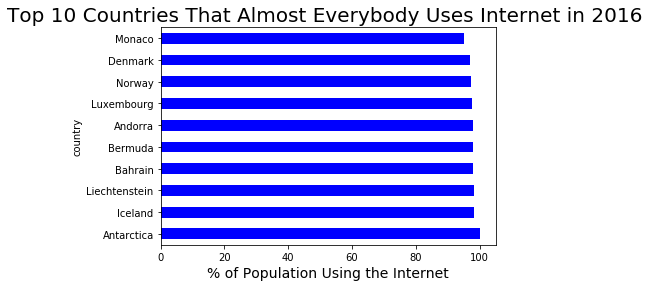

In [168]:
# What countries have almost 100% of their population using the Internet?


top_perc_internet_population = merged_data[['country', 'internet_%_of_population']]\
                            .sort_values(by=['internet_%_of_population'], ascending=False)\
                            .head(10)\
                            .set_index('country')

top_perc_internet_population.plot(kind='barh',
                                 use_index='False',
                                 legend=False,
                                 colormap='winter'
                             )

plt.title("Top 10 Countries That Almost Everybody Uses Internet in 2016 ", fontsize=20)
plt.xlabel('% of Population Using the Internet', fontsize=14)

plt.show()

In [91]:
# # check top population, internet_users, gdp and education

# top_population = merged_data[['country','population', 'median_age']]\
#                             .sort_values(by=['population'],ascending=False)\
#                             .head(25)

# top_internet = merged_data[['country', 'internet_users']]\
#                             .sort_values(by=['internet_users'], ascending=False)\
#                             .head(20)\
#                             .set_index('country')

# top_gdp = merged_data[['country', 'gdp_global_rank']]\
#                             .sort_values(by=['gdp_global_rank'], ascending=True)\
#                             .head(10)

# top_education = merged_data[['country', 'education_expenditures']]\
#                             .sort_values(by=['education_expenditures'], ascending=False)\
#                             .head(25)

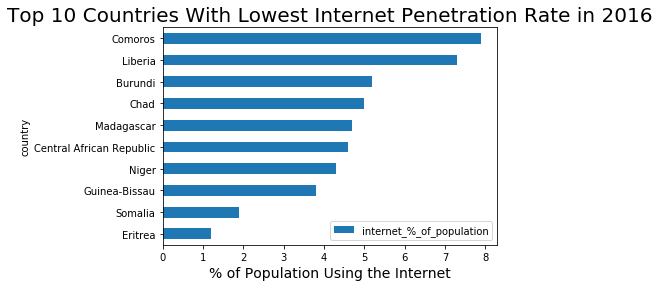

In [87]:
# What countries have the lowest Internet penetration rate in 2016?

less_perc_internet_population = merged_data[['country', 'internet_%_of_population']]\
                            .sort_values(by=['internet_%_of_population'], ascending=True)\
                            .head(10)\
                            .set_index('country')


less_perc_internet_population.plot(kind='barh')

plt.title("Top 10 Countries With Lowest Internet Penetration Rate in 2016", fontsize=20)
plt.xlabel('% of Population Using the Internet', fontsize=14)

plt.show()




<h1>Cesar's Workspace</h1>

<h1>Claudia's Workspace</h1>